In [73]:
from wilcoxon import sheets
import pandas as pd
import geopandas as gpd
import shapely
import contextily as ctx
import matplotlib.pyplot as plt

In [6]:
bus = gpd.GeoDataFrame(sheets.getGeo("Bus"), geometry=gpd.points_from_xy(bus.Longitude,bus.Latitude))

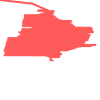

In [38]:
shapely.geometry.LineString(bus.geometry)

In [83]:
# fig, ax = plt.subplots(figsize=(15,15))
groups = bus.sort_values("StopSequence").groupby(["ServiceNo","Direction"])

In [95]:
services = ()
for (service, direction), group in groups:
    services += ({"service":service,
                 "direction":direction,
                 "geometry":shapely.geometry.LineString(group.geometry.tolist())},)

<AxesSubplot:>

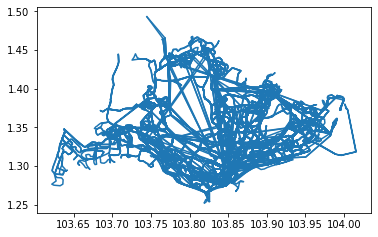

In [104]:
gpd.GeoDataFrame(services).plot()

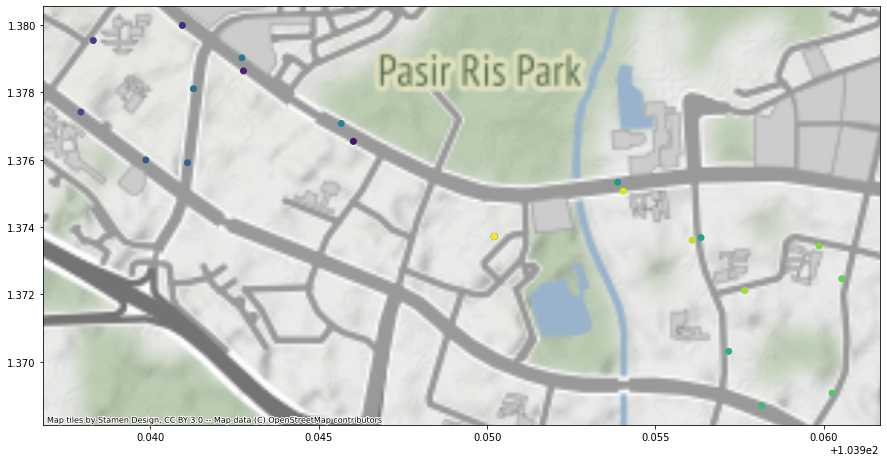

In [105]:
ax = bus[bus.ServiceNo == "358"].plot(figsize=(15,15), column="StopSequence")
ctx.add_basemap(ax=ax, zoom=14, crs="EPSG:4326")

<AxesSubplot:>

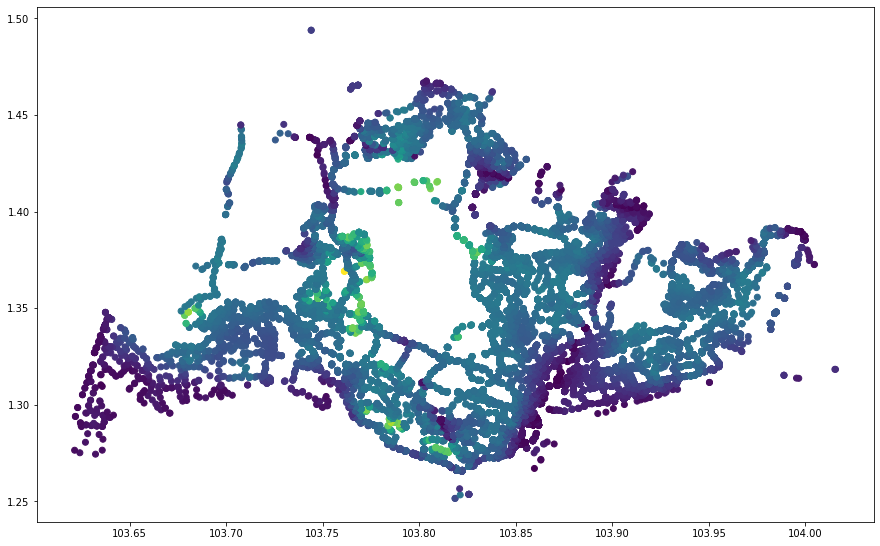

In [108]:
bus.plot(figsize=(15,15),column="Alt")